In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import glob
from tifffile import imread
from csbdeep.utils import download_and_extract_zip_file, plot_some
from csbdeep.data import RawData, create_patches
from tqdm import tqdm


In [2]:
raw_data = RawData.from_folder (
    basepath    = '/data/u934/service_imagerie/v_kapoor/CurieTrainingDatasets/Raw_Datasets/JesusFilaments/SingleChannelUnet/',
    source_dirs = ['Images'],
    target_dir  = 'Masks',
    axes        = 'YX',
)




In [3]:

save_file       = '/data/u934/service_imagerie/v_kapoor/CurieTrainingDatasets/Raw_Datasets/JesusFilaments/SingleChannelUnetFilamentSegmentation.npz'

In [4]:

X, Y, XY_axes = create_patches (
    raw_data            = raw_data,
   
    patch_size          = (64,64),
    n_patches_per_image = 2000,
    save_file           = save_file,
)


   42 raw images x    1 transformations   =    42 images
   42 images     x 2000 patches per image = 84000 patches in total
Input data:
/data/u934/service_imagerie/v_kapoor/CurieTrainingDatasets/Raw_Datasets/JesusFilaments/SingleChannelUnet/: target='Masks', sources=['Images'], axes='YX', pattern='*.tif*'
Transformations:
1 x Identity
Patch size:
64 x 64


100%|██████████| 42/42 [00:37<00:00,  1.13it/s]


Saving data to /data/u934/service_imagerie/v_kapoor/CurieTrainingDatasets/Raw_Datasets/JesusFilaments/SingleChannelUnetFilamentSegmentation.npz.


In [5]:
assert X.shape == Y.shape
print("shape of X,Y =", X.shape)
print("axes  of X,Y =", XY_axes)

shape of X,Y = (84000, 1, 64, 64)
axes  of X,Y = SCYX


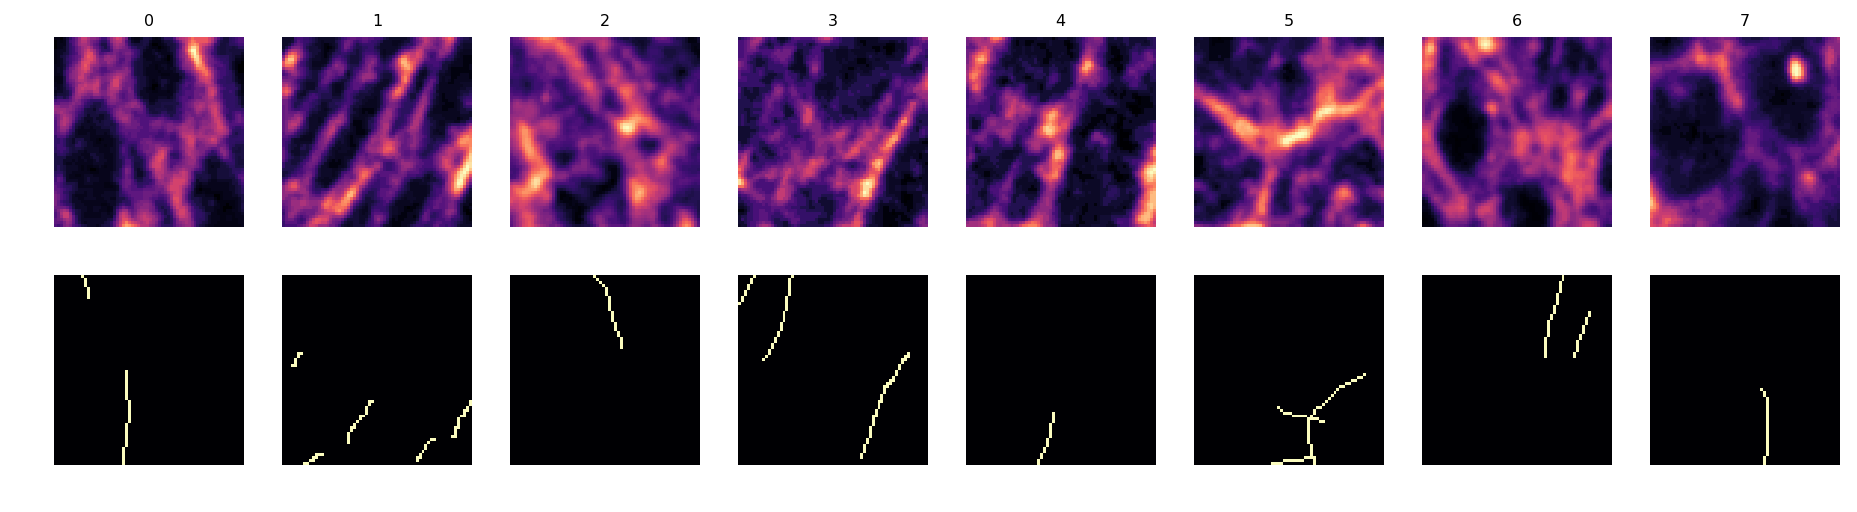

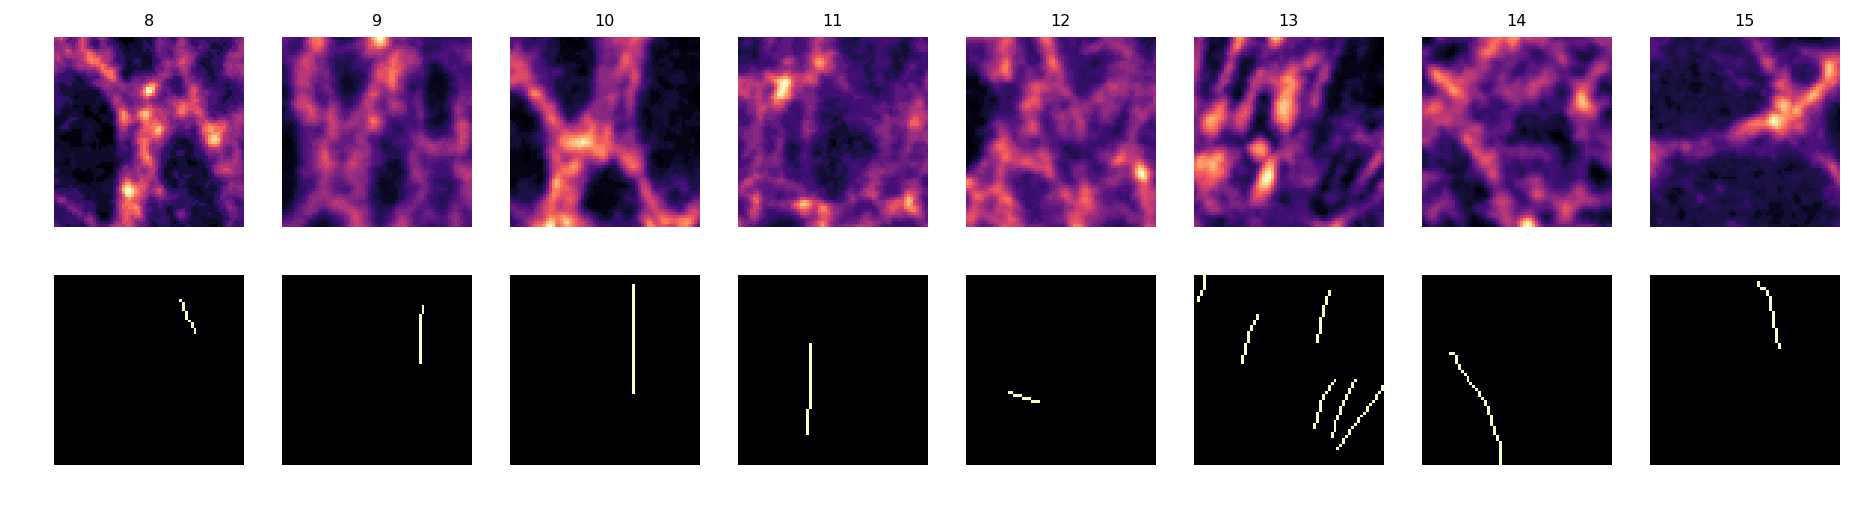

In [6]:
for i in range(2):
    plt.figure(figsize=(16,4))
    sl = slice(8*i, 8*(i+1)), 0
    plot_some(X[sl],Y[sl],title_list=[np.arange(sl[0].start,sl[0].stop)])
    plt.show()
None;